###Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

###Importing the dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv")
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [ ]:
df.shape

(48842, 10)

In [ ]:
df.describe(include='all')

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
count,48842.000000,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,NaN,2,9,16,7,15,6,5,42,2
top,NaN,Male,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,United-States,<=50K
freq,NaN,32650,33906,15784,22379,6172,19716,41762,43832,37155
mean,38.643585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.710510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [ ]:
for i in df.columns:
    non_value = df[i].isin(['?']).sum()
    if non_value > 0:
        print(i)
        print('{}'.format(float(non_value) / (df[i].shape[0]) * 100))
        print('\n')

WorkingClass
5.7307235575938735


Occupation
5.751197739650301


NativeCountry
1.7546374022357807




In [ ]:
df = df[df['WorkingClass'] != '?']
df = df[df['Occupation'] != '?']
df = df[df['NativeCountry'] != '?']

###Analyzing the data using different Plots

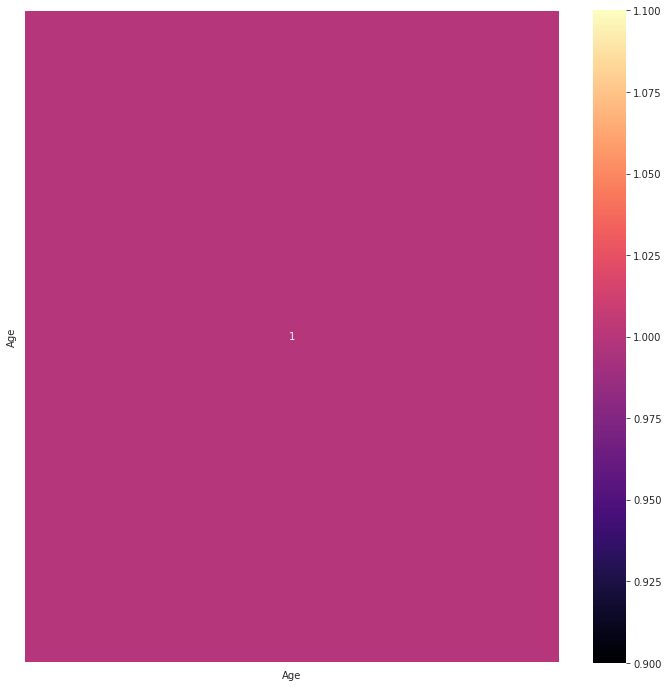

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='magma', linecolor='white', linewidths=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


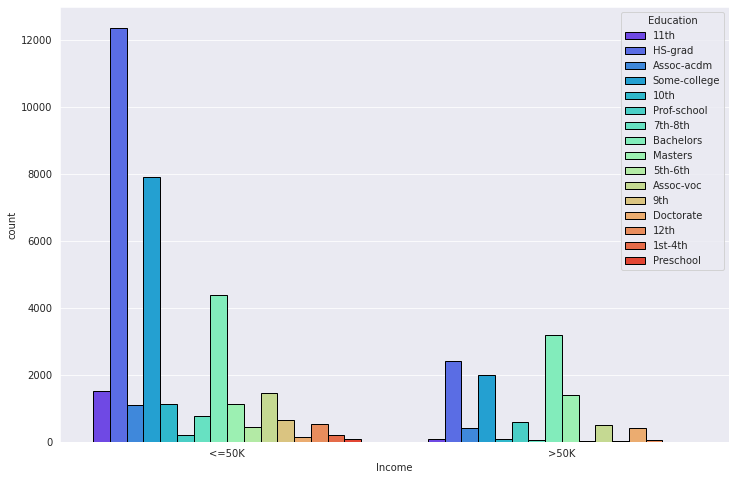

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income'], hue = df['Education'], palette = 'rainbow', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

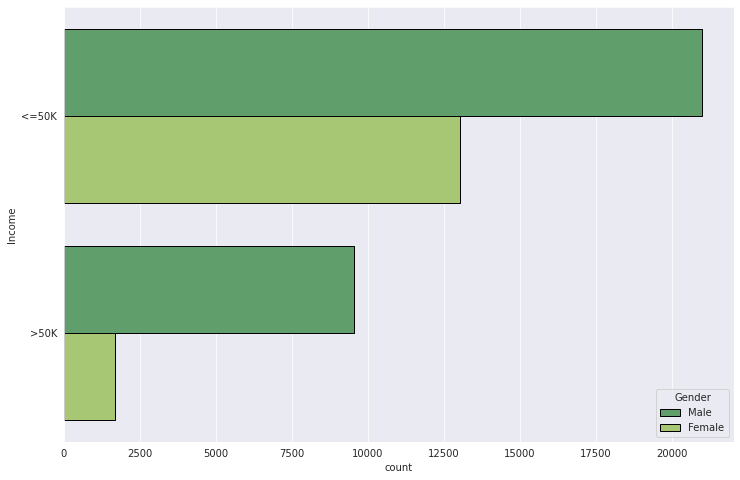

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y = df['Income'], hue = df['Gender'], palette = 'summer', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

The number of men with each qualification
HS-grad         10122
Some-college     6185
Bachelors        5240
Masters          1711
Assoc-voc        1284
11th             1063
Assoc-acdm        922
10th              832
Prof-school       661
7th-8th           626
9th               489
Doctorate         436
12th              398
5th-6th           340
1st-4th           166
Preschool          52
Name: Education, dtype: int64


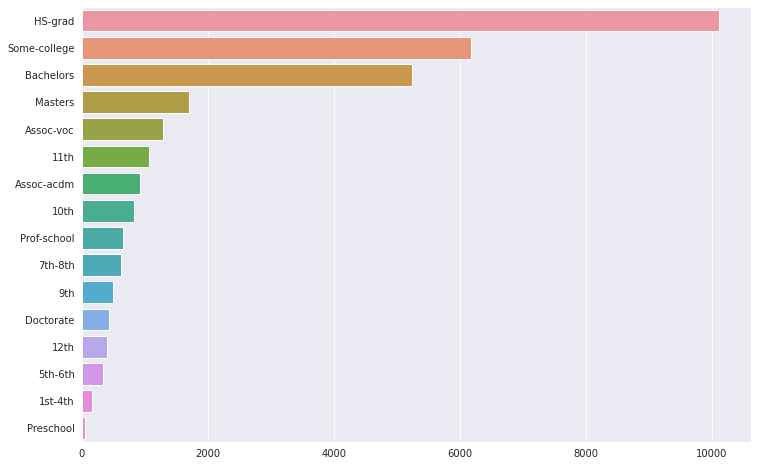

In [ ]:
print("The number of men with each qualification")
print(df[df['Gender'] == 'Male']['Education'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x = df[df['Gender'] == 'Male']['Education'].value_counts().values, y = df[df['Gender'] == 'Male']['Education'].value_counts().index, data = df)
plt.show()

HS-grad         4661
Some-college    3714
Bachelors       2330
Masters          803
Assoc-voc        675
Assoc-acdm       585
11th             556
10th             391
7th-8th          197
9th              187
12th             179
Prof-school      124
5th-6th          109
Doctorate        108
1st-4th           56
Preschool         20
Name: Education, dtype: int64


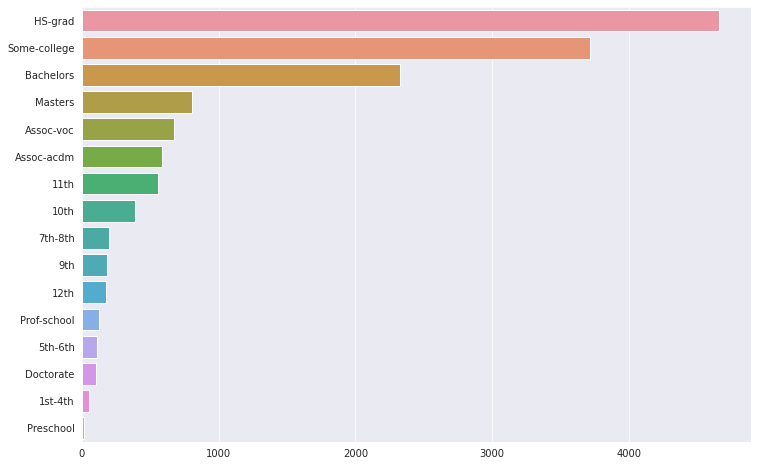

In [ ]:
("The number of women with each qualification")
print(df[df['Gender'] == 'Female']['Education'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x = df[df['Gender'] == 'Female']['Education'].value_counts().values, y = df[df['Gender'] == 'Female']['Education'].value_counts().index, data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


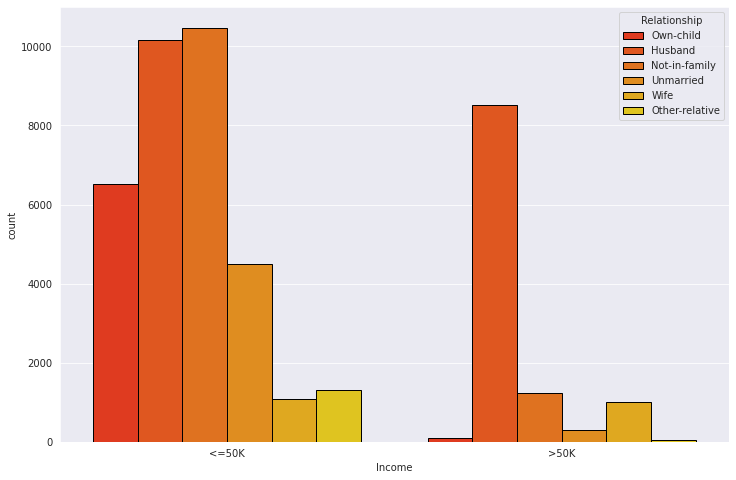

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income'], hue = df['Relationship'], palette = 'autumn', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


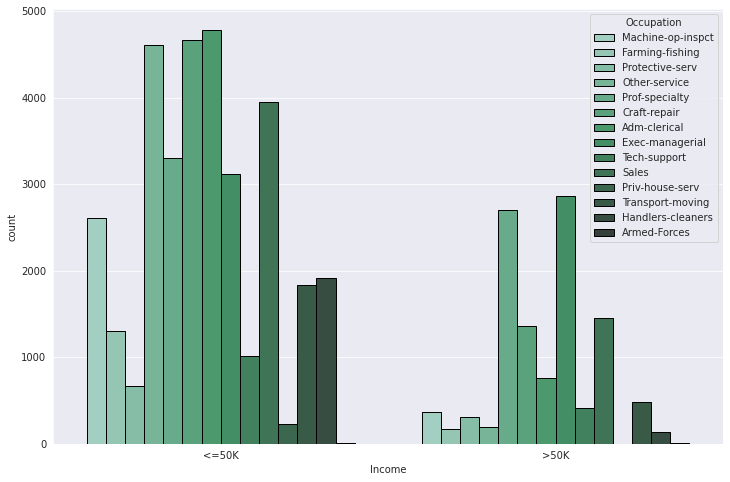

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income'], hue = df['Occupation'], palette = 'BuGn_d', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


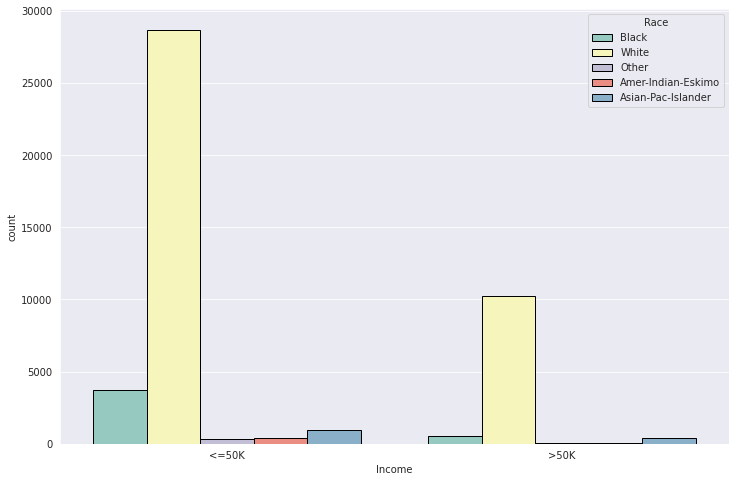

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income'], hue = df['Race'], palette = 'Set3', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


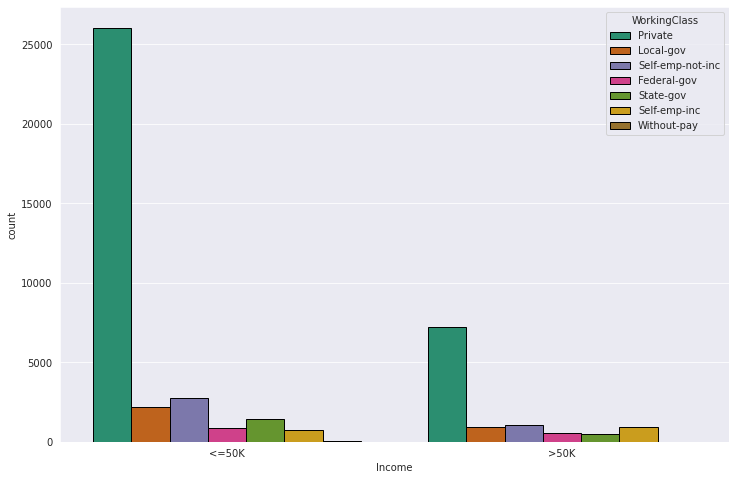

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income'], hue = df['WorkingClass'], palette = 'Dark2', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

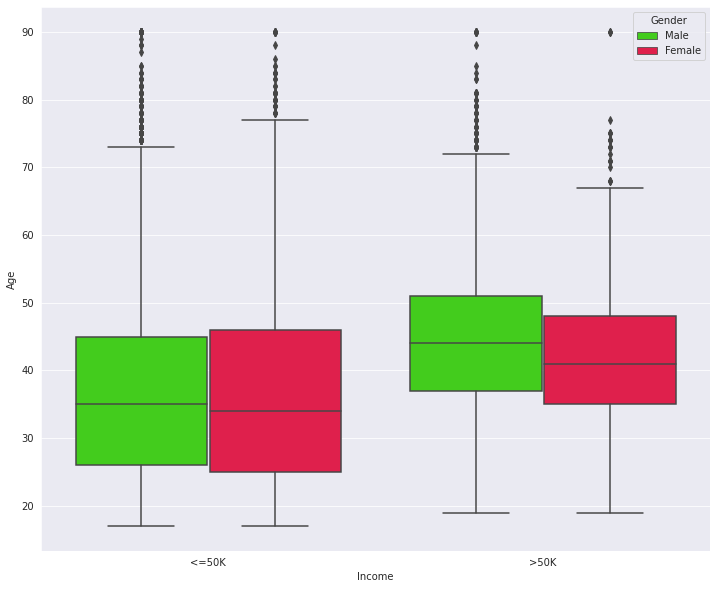

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='Income', y='Age', data=df, hue='Gender', palette = 'prism')
plt.show()

In [ ]:
df['MaritalStatus'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
df['MaritalStatus'] = df['MaritalStatus'].replace(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Divorced',
                                  'Married-spouse-absent', 'Married-AF-spouse'], ['not married', 'married', 'not married',
                                   'not married', 'not married', 'not married', 'married'])

In [ ]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,not married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,married,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,married,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,married,Machine-op-inspct,Husband,Black,United-States,>50K
5,34,Male,Private,10th,not married,Other-service,Not-in-family,White,United-States,<=50K


In [ ]:
df = pd.get_dummies(df, columns=['WorkingClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship','Race', 'Gender',
                           'NativeCountry'], drop_first=True)

In [ ]:
df.head()

,Age,Income,WorkingClass_Local-gov,WorkingClass_Private,WorkingClass_Self-emp-inc,WorkingClass_Self-emp-not-inc,WorkingClass_State-gov,WorkingClass_Without-pay,Education_11th,Education_12th,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
0,25,<=50K,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,>50K,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,>50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


###Splitting the data

In [ ]:
X = df.drop('Income', axis=1)
y = df['Income']

In [ ]:
y = pd.get_dummies(y, columns=y, drop_first=True)
y = y.iloc[:,-1]
y.shape

(45222,)

###Doing train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [ ]:
feature_select = SelectKBest(chi2, k = 8)  #finding the top 8 best features
feature_select.fit(X_train, y_train)

SelectKBest(k=8, score_func=<function chi2 at 0x7fd78a12b4d0>)

In [ ]:
score_list = feature_select.scores_
top_features = X_train.columns

In [ ]:
uni_features = list(zip(score_list, top_features))
print(sorted(uni_features, reverse=True)[0:8])

[(9058.663067891663, 'Age'), (3341.9406572228977, 'MaritalStatus_not married'), (1550.5330836394578, 'Relationship_Own-child'), (1298.6807139811253, 'Occupation_Exec-managerial'), (1079.9742230738839, 'Occupation_Prof-specialty'), (1010.4939657637734, 'Education_Bachelors'), (994.1160309541101, 'Relationship_Not-in-family'), (984.0849651374288, 'Education_Masters')]


####1) Random Forest Classifier

Accuracy is:  0.8174682144831399


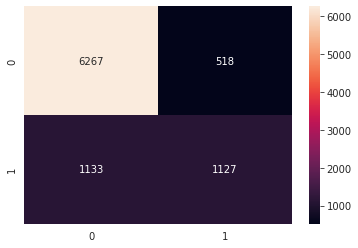

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_1 = feature_select.transform(X_train)
X_test_1 = feature_select.transform(X_test)

 
rf_clf = RandomForestClassifier()      
rf_clf.fit(X_train_1,y_train)

rf_pred = rf_clf.predict(X_test_1)

accu_rf = accuracy_score(y_test, rf_pred)
print('Accuracy is: ',accu_rf)

cm_1 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_1, annot=True, fmt="d")
plt.show()

####2) KNN Classifier

Accuracy is:  0.7490326147042565


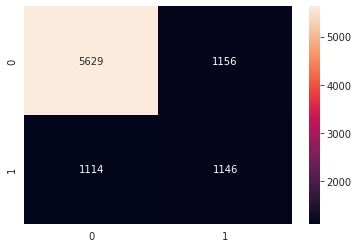

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)


knn_clf = KNeighborsClassifier(n_neighbors=1)      
knn_clf.fit(X_train_2,y_train)

knn_pred = knn_clf.predict(X_test_2)

accu_knn = accuracy_score(y_test, knn_pred)
print('Accuracy is: ',accu_knn)

cm_2 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_2, annot=True, fmt="d")
plt.show()

In [ ]:
accu_score = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_2, y_train)
    prediction = knn.predict(X_test_2)
    accu_score.append(accuracy_score(prediction, y_test))

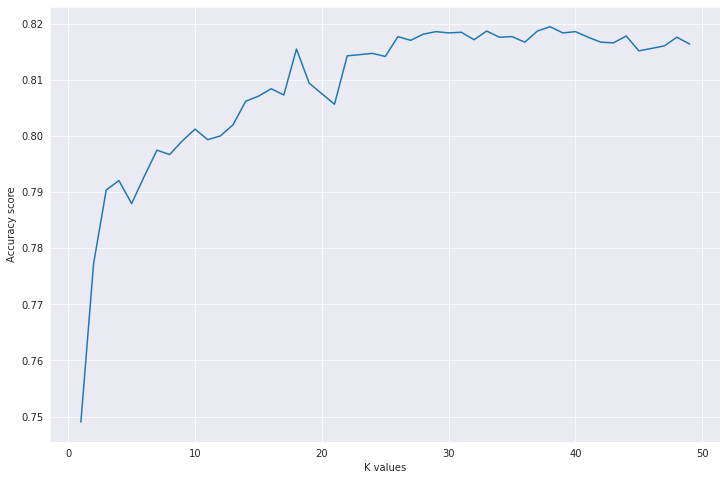

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(range(1, 50), accu_score)
plt.xlabel('K values')
plt.ylabel('Accuracy score')
plt.show()

Accuracy is:  0.8181315644002212


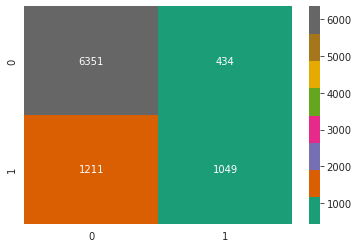

In [ ]:
X_train_3 = feature_select.transform(X_train)
X_test_3 = feature_select.transform(X_test)


knn_clf_1 = KNeighborsClassifier(n_neighbors=28)      
knn_clf_1.fit(X_train_2,y_train)

knn_pred_1 = knn_clf_1.predict(X_test_2)

accu_knn_1 = accuracy_score(y_test, knn_pred_1)
print('Accuracy is: ',accu_knn_1)

cm_3 = confusion_matrix(y_test, knn_pred_1)
sns.heatmap(cm_3, annot=True, fmt="d", cmap='Dark2')
plt.show()

####3) KFold Model

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

kfold = KFold(n_splits = 10, shuffle=True, random_state = 5)

result = cross_val_score(rf, X_train_1, y_train, cv=kfold, scoring='accuracy')

print(result.mean())

0.8142468699723209


In [ ]:
from sklearn.feature_selection import RFECV
 
clf_rf_3 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy')    
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 5
Best features : Index(['Age', 'Education_Bachelors', 'MaritalStatus_not married',
       'Occupation_Exec-managerial', 'Occupation_Prof-specialty'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


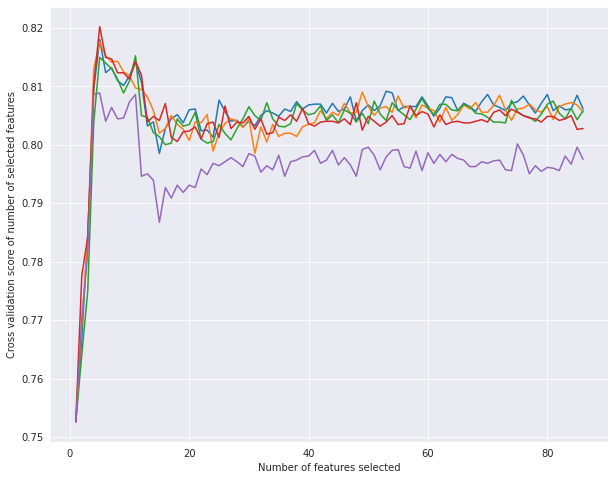

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

###Conclusion:-
We have implemented the income prediction through different Machine Learning Algorithms and also have visualize the data using different plots. We also found that Random Forest Classifier performs best with an accuracy score of 0.817 